In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model("./Model.h5")

In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np


Bad key savefig.frameon in file /home/deepdroid/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/deepdroid/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/deepdroid/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an 

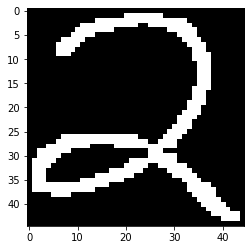

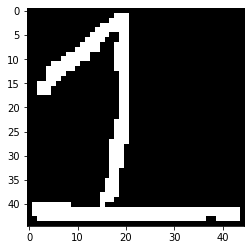

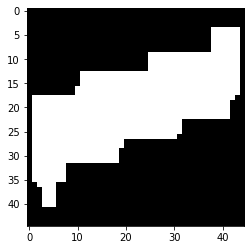

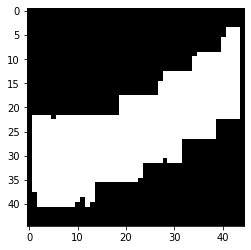

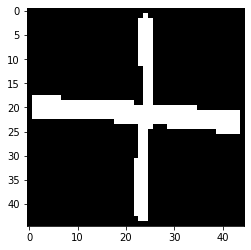

In [33]:
base_folder = "./Expression"

custom_images = []

for f in os.listdir(base_folder):
    im = cv2.imread(os.path.join(base_folder, f), cv2.IMREAD_GRAYSCALE)
    im = cv2.resize(im, (45, 45))
    custom_images.append((im>=127).astype("uint8"))
    plt.imshow(im >= 127, cmap="gray")
    plt.show()

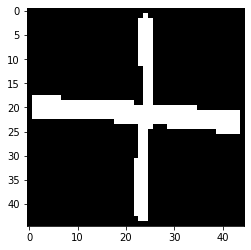

1


In [204]:
for im in custom_images[4:5]:
    plt.imshow(im, cmap="gray")
    plt.show()
    pred = model.predict(im.reshape(-1, 45, 45, 1))
    print(np.argmax(pred))

In [28]:
# import pandas as pd

# data = pd.read_csv("./data.csv")

In [34]:
# data_images = []

# for i in range(15):
#     data_images.append(data[data["class"] == i].values[0, :-1])

# del data

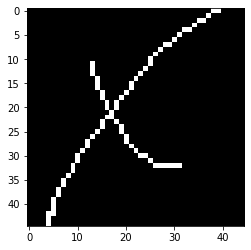

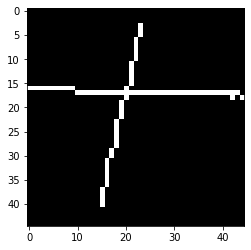

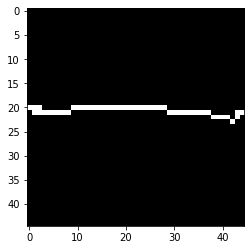

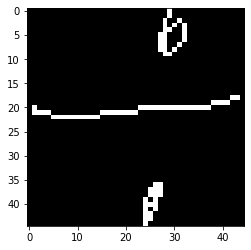

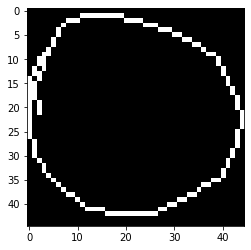

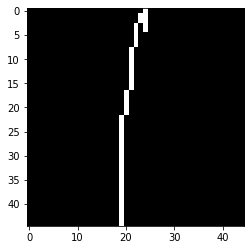

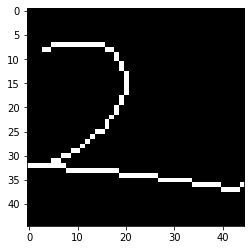

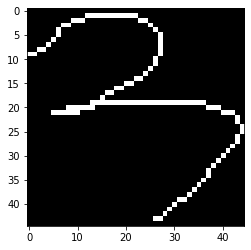

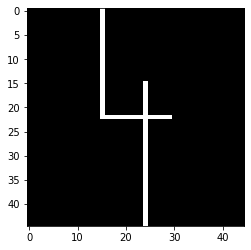

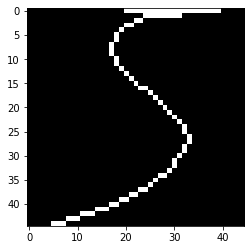

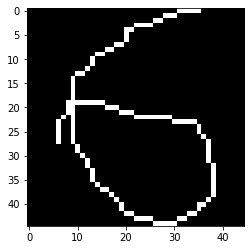

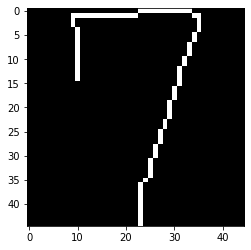

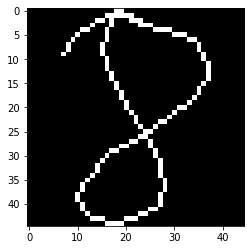

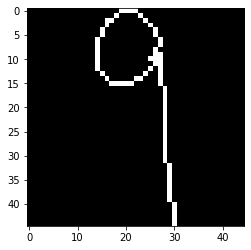

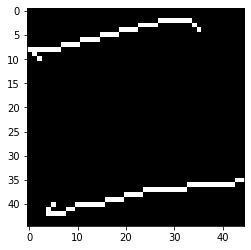

In [38]:
# for im in data_images:
#     plt.imshow(im[:-1].reshape(45,45), cmap="gray")
#     plt.show()

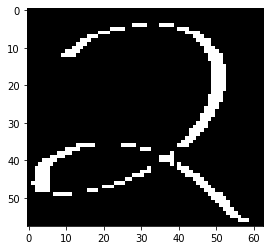

In [29]:
im = custom_images[0]
im = cv2.erode(im, (11, 11), iterations=3)

plt.imshow(im, cmap="gray")
plt.show()

In [35]:
K1 = np.array([[-1, -1, -1], [0, 1, 0], [1, 1, 1]])
K2 = np.array([[0, -1, -1], [1, 1, -1], [0, 1, 0]])

In [38]:
im = custom_images[0]*255

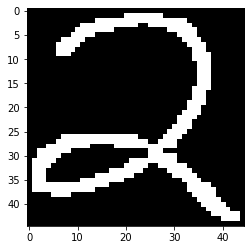

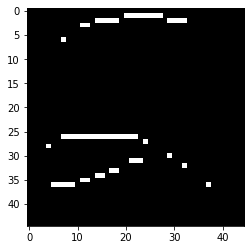

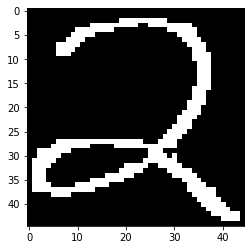

In [54]:
#Original Image
plt.imshow(im, cmap="gray")
plt.show()

#HITMISS with K1
h_k1 = cv2.morphologyEx(im, cv2.MORPH_HITMISS, K1)
plt.imshow(h_k1, cmap="gray")
plt.show()

#THINNED image
thinned = np.logical_and(im.astype("bool"), np.logical_not(h_k1.astype("bool")))
plt.imshow(thinned, cmap="gray")
plt.show()

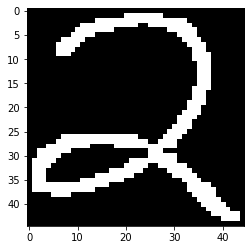

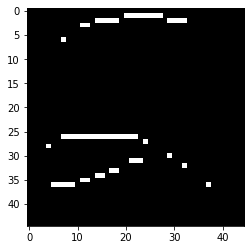

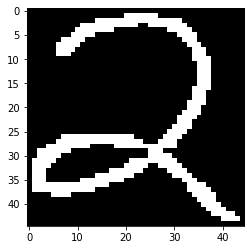

In [55]:
#Original Image
plt.imshow(im, cmap="gray")
plt.show()

#HITMISS with K1
h_k2 = cv2.morphologyEx(im, cv2.MORPH_HITMISS, K2)
plt.imshow(h_k1, cmap="gray")
plt.show()

#THINNED image
thinned = np.logical_and(im.astype("bool"), np.logical_not(h_k2.astype("bool")))
plt.imshow(thinned, cmap="gray")
plt.show()

In [182]:
def get_kernels(kernel_size = (3,3)):

    K1 = np.array([[-1, -1, -1], [0, 1, 0], [1, 1, 1]])
    K2 = np.array([[0, -1, -1], [1, 1, -1], [0, 1, 0]])

    kernels = []
    kernels.append((K1, K2))

    def rotate3x3(kernel):
        kernel_temp = np.empty_like(kernel)

        kernel_temp[0, :] = kernel[::-1, 0]
        kernel_temp[:, -1] = kernel[0, :]
        kernel_temp[-1, :] = kernel[::-1, -1]
        kernel_temp[:, 0] = kernel[-1, :]

        kernel_temp[1,1] = kernel[1,1]

        return kernel_temp

    for i in range(3):
        K1, K2 = rotate3x3(K1), rotate3x3(K2)
        kernels.append((K1, K2))
    
    return kernels
        

In [206]:
kernels = get_kernels()

In [207]:
thinned_im = custom_images[1] * 255
prev_thinned_im = np.copy(thinned_im)
while True:
    for k1, k2 in kernels:
        h_k1 = cv2.morphologyEx(thinned_im.astype("uint8"), cv2.MORPH_HITMISS, k1)
        thinned_im = np.logical_and(thinned_im.astype("bool"), np.logical_not(h_k1.astype("bool"))) * 255

        h_k2 = cv2.morphologyEx(thinned_im.astype("uint8"), cv2.MORPH_HITMISS, k2)
        thinned_im = np.logical_and(thinned_im.astype("bool"), np.logical_not(h_k2.astype("bool"))) * 255
    
    prev_thinned_im = np.copy(thinned_im)
    if np.any(thinned_im == prev_thinned_im):
        break


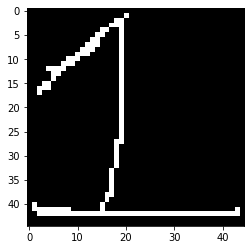

In [208]:
plt.imshow(thinned_im, cmap="gray")
plt.show()

In [209]:
pred = model.predict((thinned_im > 127).astype("uint8").reshape(-1, 45, 45, 1))
np.argmax(pred)

5